In [1]:
%load_ext autoreload
%autoreload 2

# Demo

**Demo: Explain the package, as well as this demo**

In [5]:
import re
import json
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm
from pathlib import Path
from collections import Counter

from src.career_paths_cv_parser.embeddings.train import Trainer

ModuleNotFoundError: No module named 'src'

## Data

In [6]:
# Consider only the profiles scraped from LinkedIn
PROFILE_PATH = Path.home() / 'data/career_paths/profiles'

# Name assigned to the clustering-model
name = 'demo'

In [27]:
def clean_f(x:str) -> str:
    """Cleaning function of the raw text."""
    x = x.lower()
    return re.sub('\W+', ' ', x).strip()

In [28]:
# Load in the data, and clean
with open(Path.cwd() / 'demo/demo.json', 'r') as f:
    data = json.load(f)

In [30]:
data_clean = [clean_f(s) for s in items_all]
print(f"Total of {len(data_clean)} data samples")
data_count = [(k, v) for k, v in sorted(Counter(data_clean).items(), key=lambda x: x[1])]
print(f" --> {len(data_count)} unique")

print(f"\n10 most frequent samples:")
for sample, count in list(reversed(data_count))[:10]:
    print(f" - {sample} ({count})")

Total of 21505 data samples
 --> 9853 unique

10 most frequent samples:
 - ku leuven (358)
 - katholieke universiteit leuven (290)
 - universiteit gent (263)
 - hogeschool gent (238)
 - vrije universiteit brussel (127)
 - katholieke hogeschool limburg (106)
 - insead (106)
 - université catholique de louvain (98)
 - vlerick business school (93)
 - universiteit antwerpen (89)


Analyse on frequency:
 - Sample frequency >=  0  --> 100% of all samples (9853 samples in total)
 - Sample frequency >= 50  -->  15% of all samples (33 samples in total)
 - Sample frequency >= 100 -->   7% of all samples (7 samples in total)
 - Sample frequency >= 150 -->   5% of all samples (4 samples in total)
 - Sample frequency >= 200 -->   5% of all samples (4 samples in total)
 - Sample frequency >= 250 -->   4% of all samples (3 samples in total)
 - Sample frequency >= 300 -->   2% of all samples (1 samples in total)
 - Sample frequency >= 350 -->   2% of all samples (1 samples in total)


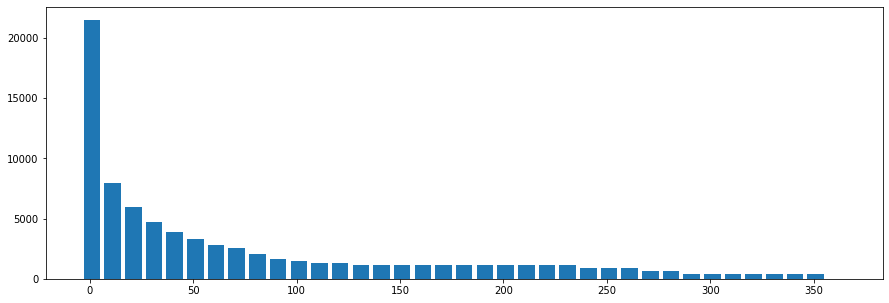

In [38]:
# Plot frequency of the data
counts = sorted([x for k,x in data_count], reverse=True)
x, y = [], []
for i in range(1, max(counts)+10, 10):
    x.append(i)
    y.append(sum(c for c in counts if i <= c))

print(f"Analyse on frequency:")
for freq in range(0,max(counts),50):
    print(f" - Sample frequency >= {freq:^3d} --> {round(100*sum(c for c in counts if freq <= c)/sum(counts)):3d}% of all samples ({len([c for c in counts if freq <= c])} samples in total)")

plt.figure(figsize=(15,5))
plt.bar(x, y, width=8)
plt.show()

## Training

**TODO: Explain model creation and training**

In [10]:
trainer = Trainer(
    name=name,
    data=items_all,
    clean_f=clean_f,
    clusters=CLUSTERS,
    garbage=GARBAGE,
)

Total of 21984 data items (frequency>=2):
 -->  Unique items: 2249
 --> Max frequency: 693
 --> Avg frequency: 9.78
 --> Med frequency: 2
 --> Min frequency: 2


Analysing encoder 'encoder-school-bpe-300'

Analysing word 'sainte marie':
 --> Encoding: [127, 15, 20, 193, 21]
 --> Word by word:
     - 127: sa
     - 15: in
     - 20: te
     - 193: mar
     - 21: ie

Analysing word 'ecole catholique arts métiers':
 --> Encoding: [65, 227, 189, 267]
 --> Word by word:
     - 65: ecole
     - 227: catholique
     - 189: arts
     - 267: metiers

Analysing word 'kul':
 --> Encoding: [74, 174]
 --> Word by word:
     - 74: k
     - 174: ul

Analysing word 'katholieke hogeschool gent':
 --> Encoding: [238, 61, 116]
 --> Word by word:
     - 238: katholieke
     - 61: hogeschool
     - 116: gent

Analysing word 'universite paris pantheon sorbonne':
 --> Encoding: [54, 80, 28, 98, 263, 17, 16, 45, 295, 244]
 --> Word by word:
     - 54: universite
     - 80: paris
     - 28: p
     - 98: ant
  

Loss ???:   0%|          | 0/8 [00:00<?, ?it/s]



Cluster overview:

Validated clusters, total of 87:
 -->  Largest cluster-size: 30
 -->  Average cluster-size: 5.712643678160919
 -->   Median cluster-size: 4
 --> Smallest cluster-size: 1
 -->      #unique clusters: 1

Approximated clusters, total of 1654:
 -->  Largest cluster-size: 236
 -->  Average cluster-size: 1.4165659008464329
 -->   Median cluster-size: 1
 --> Smallest cluster-size: 1
 -->      #unique clusters: 1567
 -->     #garbage clusters: 969



==> Running epoch 1 <==


Loss 0.03761: 100%|██████████| 8/8 [01:26<00:00, 10.84s/it]


Validating:
Approximating clusters...
Generating validations...

Add to cluster? (sim: 0.5329999923706055)
 - Unclustered: 'georgia institute technology'
 -     Cluster: 'Grenoble Alpes University'
 -       Match: 'universite grenoble alpes'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.9959999918937683)
 - Unclustered: 'ecole catholique arts métiers groep'
 -     Cluster: 'ECAM Group'
 -       Match: 'ecole catholique arts métiers group'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : 1
 --> Added to cluster

Add to cluster? (sim: 0.8320000171661377)
 - Unclustered: 'concordia university'
 -     Cluster: 'University of Cambridge'
 -       Match: 'university cambridge'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : r
 --> Invalid input 'r', try again

Add to cluster? (sim: 0.8320000171661377)
 - Unclustered: 'concordia university'
 -     Cluster: 'University of Cambridge'
 -       Match: 'university cambridge'


 --> Cluster ('h <term>' for help) :Paris-Saclay Normal School
 ----> Added to cluster 'Paris-Saclay Normal School'

Add to cluster? (sim: 0.722000002861023)
 - Unclustered: 'imd business school'
 -     Cluster: 'Solvay Business School'
 -       Match: 'sbs em'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.546999990940094)
 - Unclustered: 'lean six sigma'
 -     Cluster: 'Solvay Business School'
 -       Match: 'ecole commerce solvay'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.7689999938011169)
 - Unclustered: 'hepl haute ecole province liege'
 -     Cluster: 'University of Haute Alsace'
 -       Match: 'university haute alsace'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.7369999885559082)
 - Unclustered: 'khk kempen'
 -     Cluster: 'Catholic University of Leuven'
 -       Match: 'group technology'
Add:1/a

Loss ???:   0%|          | 0/8 [00:00<?, ?it/s]


Ratio of clustered items: 39.29%
Ratio of clustered non-garbage items: 46.61%
==> Running epoch 2 <==


Loss 0.0211: 100%|██████████| 8/8 [01:26<00:00, 10.80s/it] 


Validating:
Approximating clusters...
Generating validations...

Add to cluster? (sim: 0.7940000295639038)
 - Unclustered: 'isil'
 -     Cluster: 'ISAE Group'
 -       Match: 'isae group'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.6539999842643738)
 - Unclustered: 'college saint michel'
 -     Cluster: 'University of La Rochelle'
 -       Match: 'universite rochelle'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.996999979019165)
 - Unclustered: 'arts metiers paristech ecole nationale superieure arts metiers'
 -     Cluster: 'Arts and Crafts Paristech'
 -       Match: 'arts metiers paristech'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : 1
 --> Added to cluster

Add to cluster? (sim: 0.8379999995231628)
 - Unclustered: 'university plymouth'
 -     Cluster: 'Emlyon Business School'
 -       Match: 'em lyon'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/

Loss ???:   0%|          | 0/8 [00:00<?, ?it/s]


Ratio of clustered items: 40.82%
Ratio of clustered non-garbage items: 48.43%
==> Running epoch 3 <==


Loss 0.01427: 100%|██████████| 8/8 [01:24<00:00, 10.56s/it]


Validating:
Approximating clusters...
Generating validations...

Add to cluster? (sim: 0.7160000205039978)
 - Unclustered: 'forem'
 -     Cluster: 'University of Evry'
 -       Match: 'universite evry'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.7200000286102295)
 - Unclustered: 'sup biotech ecole biotechnologies'
 -     Cluster: 'University of Mons'
 -       Match: 'umons'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.9940000176429749)
 - Unclustered: 'polytech grenoble'
 -     Cluster: 'Grenoble Polytechnic Institute'
 -       Match: 'institut polytechnique grenoble'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : 1
 --> Added to cluster

Add to cluster? (sim: 0.8009999990463257)
 - Unclustered: 'cvo mechelen'
 -     Cluster: 'National Conservatory of Arts and Crafts'
 -       Match: 'nationaal conservatorium kunsten ambachten'
Add:1/a, Garbage:2/g, Ignore:3

 --> Cluster ('h <term>' for help) :Grenoble Alpes University
 ----> Added to cluster 'Grenoble Alpes University'

Add to cluster? (sim: 0.847000002861023)
 - Unclustered: 'higher education corporation paris'
 -     Cluster: 'University of Cambridge'
 -       Match: 'university cambridge'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.6779999732971191)
 - Unclustered: 'microsoft partner network'
 -     Cluster: 'Nancy National School of Mines'
 -       Match: 'ensmn'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.9430000185966492)
 - Unclustered: 'epitech european institute technology'
 -     Cluster: 'European Business School'
 -       Match: 'ecole commerce europeenne'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : 1
 --> Added to cluster

Add to cluster? (sim: 0.6639999747276306)
 - Unclustered: 'heriot watt university'
 -     Cluster: 'Harvard University'
 - 

Loss ???:   0%|          | 0/8 [00:00<?, ?it/s]


Ratio of clustered items: 41.66%
Ratio of clustered non-garbage items: 49.43%
==> Running epoch 4 <==


Loss 0.01193: 100%|██████████| 8/8 [01:25<00:00, 10.65s/it]


Validating:
Approximating clusters...
Generating validations...

Add to cluster? (sim: 0.6150000095367432)
 - Unclustered: 'sint jan berchmanscollege westmalle'
 -     Cluster: 'Grenoble Alpes University'
 -       Match: 'grenoble ecole management'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.7360000014305115)
 - Unclustered: 'tallinna tehnikaulikool'
 -     Cluster: 'Vlerick Business School'
 -       Match: 'vlerick business school'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.7210000157356262)
 - Unclustered: 'hoger instituut kempen'
 -     Cluster: 'Emlyon Business School'
 -       Match: 'em lyon'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage

Add to cluster? (sim: 0.7509999871253967)
 - Unclustered: 'pih kortrijk'
 -     Cluster: 'University of La Rochelle'
 -       Match: 'universiteit rochelle'
Add:1/a, Garbage:2/g, Ignore:3/i,

 --> Cluster ('h <term>' for help) :Catholic University of Leuven
 ----> Added to cluster 'Catholic University of Leuven'

Add to cluster? (sim: 0.9900000095367432)
 - Unclustered: 'groep technology leuven'
 -     Cluster: 'Catholic University of Leuven'
 -       Match: 'katholieke universiteit leuven'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : 1
 --> Added to cluster

Add to cluster? (sim: 0.972000002861023)
 - Unclustered: 'universite denis diderot university paris vii'
 -     Cluster: 'Paris Diderot University'
 -       Match: 'diderot paris vii university'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : 1
 --> Added to cluster

Add to cluster? (sim: 0.6399999856948853)
 - Unclustered: 'politecnico di torino'
 -     Cluster: 'University of Strasbourg'
 -       Match: 'universiteit straatsburg'
Add:1/a, Garbage:2/g, Ignore:3/i, Other:4/o, Help:5/h : g
 --> Added as garbage


Cluster overview:

Validated clusters, total of 87:
 -->  Largest cluster-size: 30
 -->  

Loss ???:   0%|          | 0/8 [00:00<?, ?it/s]


Ratio of clustered items: 42.14%
Ratio of clustered non-garbage items: 50.0%
==> Running epoch 5 <==


Loss 0.01025: 100%|██████████| 8/8 [01:25<00:00, 10.66s/it]



Ratio of clustered items: 42.21%
Ratio of clustered non-garbage items: 50.08%
INFO:tensorflow:Assets written to: /Users/rubenbroekx/Documents/Projects/HouseOfHR/career-paths-cv-parser/src/career_paths_cv_parser/embeddings/../models/embedder-school-300-100-100-normalised/assets


Cluster overview:

Validated clusters, total of 87:
 -->  Largest cluster-size: 30
 -->  Average cluster-size: 5.977011494252873
 -->   Median cluster-size: 4
 --> Smallest cluster-size: 1
 -->      #unique clusters: 1

Approximated clusters, total of 1392:
 -->  Largest cluster-size: 293
 -->  Average cluster-size: 1.6831896551724137
 -->   Median cluster-size: 1
 --> Smallest cluster-size: 1
 -->      #unique clusters: 1305
 -->     #garbage clusters: 1026





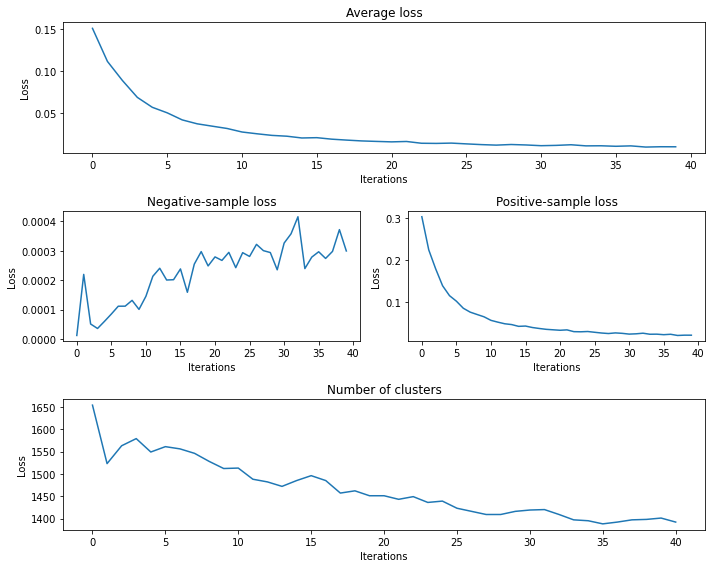

time: 31min 28s (started: 2021-02-25 21:26:46 +01:00)


In [11]:
# Train the embeddings
trainer.train(
    epochs=5,
)

In [ ]:
# TODO: Create plots in script
loss_neg, loss_pos = zip(*loss_split)
plt.figure(figsize=(10, 8))
ax = plt.subplot(3, 1, 1)
plt.plot(loss)
plt.title("Average loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax = plt.subplot(3, 2, 3)
plt.plot(loss_neg)
plt.title("Negative-sample loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax = plt.subplot(3, 2, 4)
plt.plot(loss_pos)
plt.title("Positive-sample loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax = plt.subplot(3, 1, 3)
plt.plot(cluster_count)
plt.title("Number of clusters")
plt.xlabel("Iterations")
plt.ylabel("Loss")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [13]:
trainer.visualise_tensorboard()

Run tensorboard in terminal:
tensorboard --logdir /Users/rubenbroekx/Documents/Projects/HouseOfHR/career-paths-cv-parser/src/career_paths_cv_parser/embeddings/../projector

Or run tensorboard in notebook:
%load_ext tensorboard
%tensorboard --logdir /Users/rubenbroekx/Documents/Projects/HouseOfHR/career-paths-cv-parser/src/career_paths_cv_parser/embeddings/../projector
time: 3.72 s (started: 2021-02-25 21:58:39 +01:00)
